In [1]:
import os
os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import json

import numpy as np

sns.set(font_scale=1.5)

results_folder = './server/cost_hessian/results/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
files = [['Nested', 'MNL'], ['LPMC_RemoveRest', 'LPMC_Full', 'LPMC_DrivingCost']]

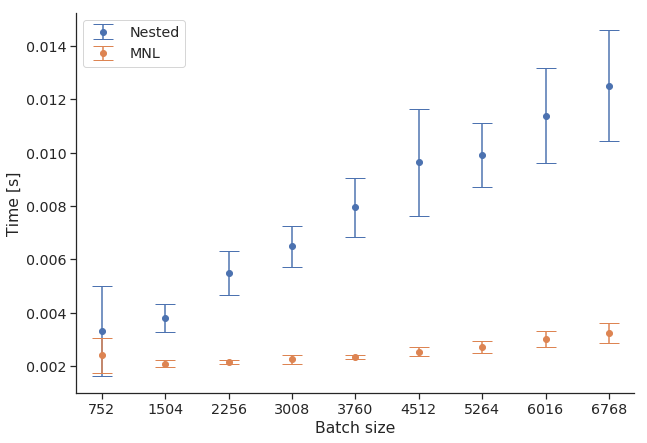

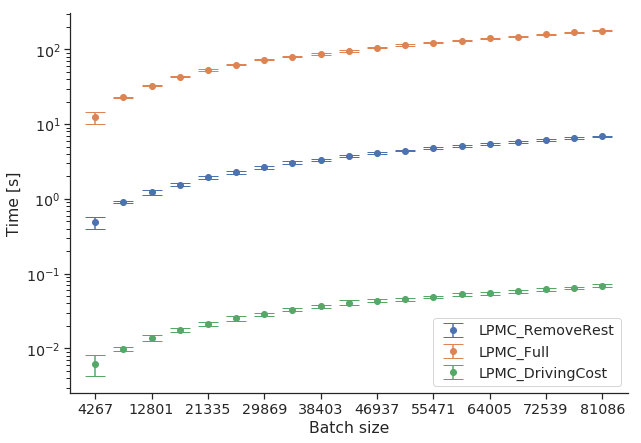

In [49]:
for i, fs in enumerate(files):
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.3)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
        "font.scale": 2
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for f in fs:
        
        with open(results_folder + f + '.json', 'r') as infile:
            data = json.load(infile)
        
        sizes = data['size']
        times = data['time']
        
        y = []
        yerr = []

        for val in times:
            y.append(np.mean(val))
            yerr.append(np.std(val))

        plt.errorbar(sizes, y, yerr, fmt='o', capsize=10, label=f)
    
    if i == 0:
        plt.xticks(sizes)
    else:
        plt.xticks(sizes[::2])
        plt.yscale('log')

    plt.ylabel('Time [s]')
    plt.xlabel('Batch size')
    plt.legend()
    